## K Neighbors Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73a5b6bba8>,
      dtype=object)

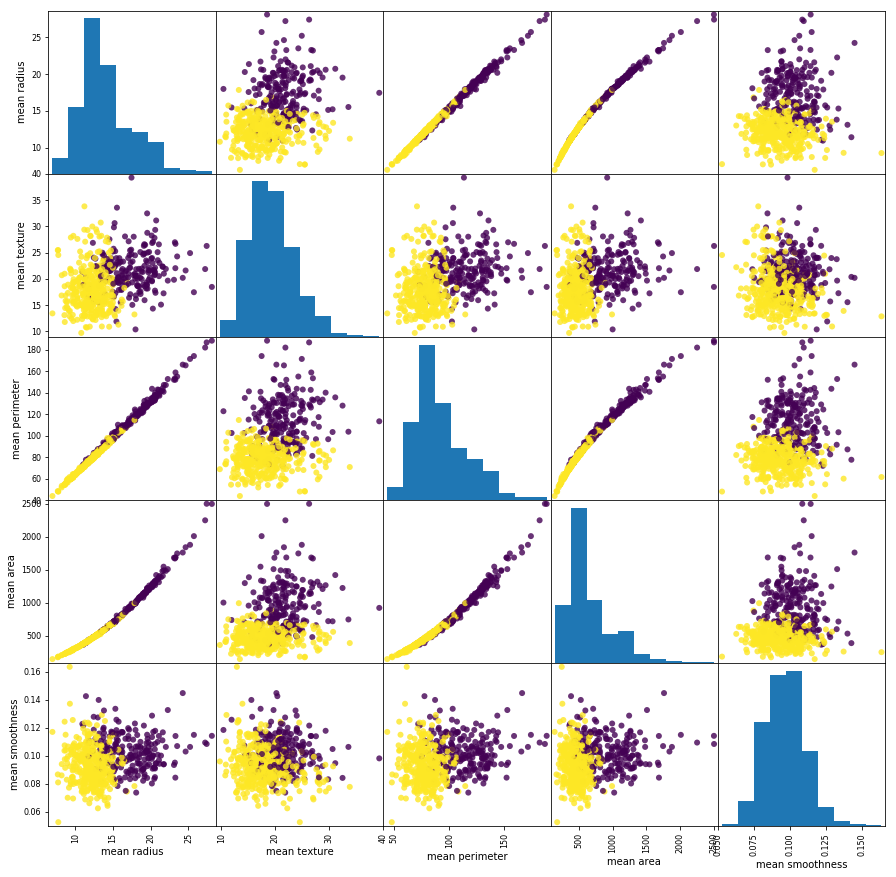

In [2]:
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from pandas.plotting import scatter_matrix

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

attributes = data.feature_names[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

In [ ]:
X.info()

In [ ]:
X.describe()

In [ ]:
X.head()

In [ ]:
X_area = X.iloc[:,3]

plt.scatter(X_area, y, c = y)
plt.xlabel('Mean Area')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
X_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

In [ ]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

It seems k = 10 is the best parameter for knn model. 

In [ ]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

In [ ]:
X.head()

In [ ]:
import mglearn
X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]

knn = KNeighborsClassifier(10)
knn.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(knn, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

## K Neighbors Regressor

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

attributes = data.feature_names[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

In [ ]:
X.head()

In [ ]:
X?

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('RSQ')

In [ ]:
#CRIM and AGE
X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(1)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

## Linear regression using the Normal Equation

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
X.head()

In [ ]:
y[:5]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

## SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

In [ ]:
sgd_reg.coef_

In [ ]:
sgd_reg.intercept_

In [ ]:
sgd_reg.n_iter_

## Polynomial regression

In [ ]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [ ]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [ ]:
print(train_score_list)
print(test_score_list)

In [ ]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

## Ridge

In [ ]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

This suggests that the best $\alpha$ parameter is 0.001

In [ ]:
print(train_score_list)
print(test_score_list)

In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

In [ ]:
ridge.coef_

In [ ]:
ridge.intercept_

In [ ]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### LASSO

In [ ]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Logistic Regression

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
X.head()

In [ ]:
y

In [ ]:
y.sum()/len(y)

In [ ]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [ ]:
%matplotlib notebook
import mglearn
X_b = X_train[10:50, [1,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

## Softmax Regression

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## LinearSVC

In [ ]:
%matplotlib inline

from sklearn.datasets import load_iris
import mglearn
iris = load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X_train, y_train)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

In [ ]:
%matplotlib inline
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-5, 5)
plt.xlim(0, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

## SVC with kernel trick

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
%matplotlib notebook

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C = 1.0  
models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, C=C))

models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

In [ ]:
%matplotlib notebook

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


models = (SVC(kernel='rbf', gamma=0.01, C=1),
         SVC(kernel = 'rbf', gamma = 0.1, C = 1),
         SVC(kernel = 'rbf', gamma = 1, C = 1),
         SVC(kernel = 'rbf', gamma = 10, C = 1))


models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = (r'$\gamma$ = 0.01',
          r'$\gamma$ = 0.1',
          r'$\gamma$ = 1',
          r'$\gamma$ = 10')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [ ]:
%matplotlib notebook

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = datasets.load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


models = (SVC(kernel='rbf', gamma=0.7, C=0.01),
         SVC(kernel = 'rbf', gamma = 0.7, C = 0.1),
         SVC(kernel = 'rbf', gamma = 0.7, C = 1),
         SVC(kernel = 'rbf', gamma = 0.7, C = 10))


models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = (r'$\gamma$ = 0.01',
          r'$\gamma$ = 0.1',
          r'$\gamma$ = 1',
          r'$\gamma$ = 10')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Decision Tree

In [ ]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

In [ ]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

In [ ]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
import mglearn
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[2,7]]
y_b = y_train[:50]

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(dtree, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

## Decision Tree Regressor

Dataset of historical computer memory (RAM) prices.

In [ ]:
import os
import pandas as pd
import mglearn
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                      "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [ ]:
%matplotlib inline
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()